# BioE 101 Lab 2#

## Objectives: ##

- Learn how to program with IPython

- Use IPython to plot signals in the time and frequency domain

- Observe aliasing and quantization error in sampled data

- Connect a microphone to your Arduino

- Estimate noise and SNR from microphone recordings

- Build an algorithm with IPython to distinguish you and your partner’s voice




##1.  Displaying signals in time and frequency domain with Python


### Observe a sine wave in time and frequency domains

Before hooking up the function generator to the Arduino, always check the waveform with an oscilloscope to make sure the output is what you want.

Using the same procedure as the end of lab 1: 
- Connect the function generator to the A0 and GND pins of the arduino and upload the send_serial.ino sketch to the Arduino board. 
- Set the sine wave to be 20 Hz with 1Vpp and 2.5V DC offset. 
    - **Any waveform is okay as long as none of the waveform dips below 0V or goes above 5V**
- Turn on the function generator and view the serial plotter using Tools->Serial Plotter. You should see the sine wave.

The Python code below is an introduction on how to use "fft" and "ifft" fucntion form "scipy.fftpack" to do fourier transfrom and inverse fourier transform. In the given arduino file, you already send the file to Serial after each run. Here, We import the data from Serial and do Fourier Analysis for it. After you run the Arduino file, please run the code below.

In [3]:
# allows plots to be plotted right below the cell when run
%matplotlib inline 
import serial # the library for reading from serial com ports
import numpy as np # naming convention for numpy library
import matplotlib.pyplot as plt # naming convention for matplotlib
from scipy.fftpack import fft, ifft # import discrete fourier transform and its inverse

Now, run this block below to define a sampling function that samples your data for 3 seconds (you can edit this to to sample for any arbitrary amount of time).

Before running, find the serial port for your arduino. On Windows, check Device Manager and go under Ports and find the Arduino COM Port. On Macs, go to the terminal and type ls /dev/tty.\* and look for the port corresponding to the Arduino.

Also before running make sure to close the Serial monitor or plotter since that is accessing the serial port and only one program can access the serial port at a time.

In [7]:
def sample_arduino():
    device = "COM9" # com port of Arduino <- CHANGE THIS TO THE ONE YOU FOUND
    baud = 115200
    ser = serial.Serial(device, baud, timeout=10)

    # 
    def read_serial_data(N):
        raw_data = []
        while (len(raw_data) < N+10): 
            data = ser.readline()
            raw_data.append(data)
        data = []
        for i in raw_data:
            try:
                data.append(float(i))
            except:
                continue
        return data
    raw_data = read_serial_data(3000) # <- Adjust this line to read in more/less data
    ser.close()
    return raw_data


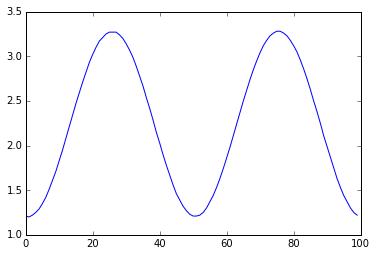

In [21]:
signal = sample_arduino()
plt.plot(signal[100:200]) # change the indices to zoom in/out in time

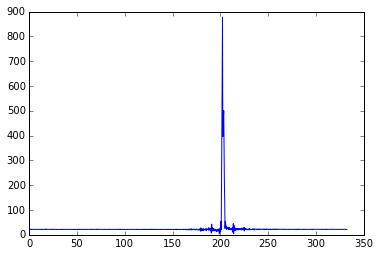

In [19]:
dft = fft(signal)
fs = 1000
N = len(dft)
freqs = [i*fs/N for i in range(N)]
plt.plot(freqs[2:1000], np.abs(dft[2:1000])) # change the indices to zoom in/out in frequency

### Question 5: 
What is the RMS noise voltage now? Why did it change?

<b>Answer:<b>

### Question 6: 
Move the positive wire around. What happens when you place it near fans or power cables behind the computer?

<b>Answer:<b>

### Question 7: 
Hold the positive/negative banana wires straight, parallel, and close together. Observe the RMS noise. Then spread them apart. What happens to the RMS noise? What happens when you touch the positive terminal? Why is the noise changing in these cases?

<b>Answer:<b>

## Part 2: Microphone ##

In this section, you will connect a simple microphone to your Arduino and measure noise and voice signal. You will then develop an algorithm to distinguish between your and your partner's voices.

The microphones you have are known as “electret” condenser microphones.
The sensing element can be thought of as a small capacitor that changes its
capacitance as a function of acoustic pressure. The sensing element is then
connected to a transistor, which converts the capacitance into a voltage signal.

Transistors are active, meaning they need to be powered by an external
voltage with a series resistor. Hence, in your microphone assemblies, there
are several leads—two short wires (one with a resistor, one without) which
should be connected to analog input 0+ and 0- on your MyDAQ, respectively,
and two long wires which should be connected to +5V (red) and DGND
(black). Check out this Wikipedia entry:
http://en.wikipedia.org/wiki/Electret_microphone.

### _Clean up later_:

measure noise - measure without voice
measure signal - measure peak amplitude of signal

distinguish between you and partner's voice - compare peaks of cross correlated voice data 

### Question 8: 
What function do you think the serial resistor serves? 
Remember, the resistor is hooked up between 5V and the output signal.

<b>Answer:<b>

### Question 9: 
What is the RMS noise voltage (in dB) with the microphone connected (without anyone talking into the microphone - make sure to connect 5V power)?

<b>Answer:<b>

### Question 10: 
Talk into the microphone at a comfortable level. What is the approximate RMS voltage that you generate while talking? What is your SNR (in dB)?

<b>Answer:<b>

<u>Processing audio signals using Python</u>

Modify the Arduino code once more to sample at 10kHz. Run the plotting code again (feel free to insert cells below this and copy it if you find that more convenient) and verify that you can see signals from your micophone and that your frequency display now shows appropriate values.

### Question 11: 
Use the x-axis scale to zoom in on a very small time/voltage window of your signal, so you’re only looking at noise. Notice the quantization error. Can you estimate the voltage step size of the ADC (i.e., the voltage increment corresponding to the least significant bit)? Compare this to the RMS noise voltage of the microphone that you measured with the scope and comment on whether it is a problem or not. How many bits of noise do you have?

<b>Answer:<b>

### Question 14: 
Pick the best singer in your team and have that person try to hum a pure
tone. Observe the time/frequency plots. What is the range of frequencies that you can hum? How close are these to pure tones (i.e. single frequency sinusoids)? If you’re musically inclined, try humming a scale and observing how the frequency spectrum changes.

<b>Answer:</b>

Do you notice any differences between the spectrum of you and your
partner’s voice? These should be particularly apparent if you have a male-female team. For the remainder of the lab, try to use SciPy's built-in functions to develop an algorithm to distinguish the two of you using the data in the frequency or time domain. The algorithm should output two Boolean values: one for each of you. There are many approaches to this, so be creative. Here are some ideas:

<li><b> i. </b>Make a decision using the power and fundamental frequency, with appropriate thresholds for each. If power is over a certain amount, assume that someone is talking. If the peak frequency is above/below a certain amount select one person or the other.

<li> <b>ii.</b> Record two waveforms of you and your partner saying the same thing. Store these two waveforms in a variable. Then use cross-correlation to compare the sampled waveforms with these saved waveforms. If the cross-correlation is particularly high, consider it as a match. <b>Hint:</b> You may find this documentation helpful: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html

### Question 15: 
Write out your approach (even if you don’t get it to work) and insert the code in the cell below.

### Bonus Question!
If you chose a method that involves a threshold (either on frequency
or RMS), try varying the threshold and seeing how many times your classifier gives true/false positives and true/false negatives. Build a ROC curve for your method!

In [3]:
#Your code goes here